In [11]:
!pip install -r requirements.txt


You should consider upgrading via the '/Users/adityabiswal/EEP153_Materials/Project3/proj3env/bin/python3.9 -m pip install --upgrade pip' command.


In [12]:
!pip install --upgrade openpyxl
!pip install openpyxl==3.1.0
!pip show openpyxl


You should consider upgrading via the '/Users/adityabiswal/EEP153_Materials/Project3/proj3env/bin/python3.9 -m pip install --upgrade pip' command.
  Using cached openpyxl-3.1.0-py2.py3-none-any.whl (250 kB)
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.1.2
    Uninstalling openpyxl-3.1.2:
      Successfully uninstalled openpyxl-3.1.2
You should consider upgrading via the '/Users/adityabiswal/EEP153_Materials/Project3/proj3env/bin/python3.9 -m pip install --upgrade pip' command.
Name: openpyxl
Version: 3.1.0
Summary: A Python library to read/write Excel 2010 xlsx/xlsm files
Home-page: https://openpyxl.readthedocs.io
Author: See AUTHORS
Author-email: charlie.clark@clark-consulting.eu
License: MIT
Location: /Users/adityabiswal/EEP153_Materials/Project3/proj3env/lib/python3.9/site-packages
Requires: et-xmlfile
Required-by: 


In [13]:
!pip install --upgrade openpyxl
!pip show openpyxl



  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.1.0
    Uninstalling openpyxl-3.1.0:
      Successfully uninstalled openpyxl-3.1.0
You should consider upgrading via the '/Users/adityabiswal/EEP153_Materials/Project3/proj3env/bin/python3.9 -m pip install --upgrade pip' command.
Name: openpyxl
Version: 3.1.2
Summary: A Python library to read/write Excel 2010 xlsx/xlsm files
Home-page: https://openpyxl.readthedocs.io
Author: See AUTHORS
Author-email: charlie.clark@clark-consulting.eu
License: MIT
Location: /Users/adityabiswal/EEP153_Materials/Project3/proj3env/lib/python3.9/site-packages
Requires: et-xmlfile
Required-by: 


In [14]:
!pip install seaborn scikit-learn sqlalchemy


You should consider upgrading via the '/Users/adityabiswal/EEP153_Materials/Project3/proj3env/bin/python3.9 -m pip install --upgrade pip' command.


In [145]:
import pandas as pd
import numpy as np
import cfe

file_path = "./Uganda.xlsx"

def prepare_data_for_year(year):
    # Load expenditures data for the given year
    x = pd.read_excel(file_path, sheet_name=f'Expenditures ({year})')
    x.columns.name = 'j'
    x['i'] = x['i'].astype(str)

    # Load prices data
    p = pd.read_excel(file_path, sheet_name='Prices').set_index(['t', 'm'])
    p.columns.name = 'j'
    # Adjust the year format as necessary to match your data
    p = p.xs(year, level='t')

    # Load household characteristics data
    d = pd.read_excel(file_path, sheet_name="HH Characteristics")
    d = d[d['t'] == year]

    d.columns.name = 'k'
    #d['i'] = pd.to_numeric(d['i'], errors='coerce')
    d['i'] = d['i'].astype(str)

    # Process expenditures data
    x = x.T.groupby('j').sum().T  # Sum over duplicate columns if any
    x = x.replace(0, np.nan)  # Replace zeros with missing
    y = np.log(x.set_index(['i', 't', 'm']))  # Log transform
    
    # Process household characteristics data
    d.set_index(['i', 't', 'm'], inplace=True)

    return y, d, p

# Preparing data for each year
y_2010, d_2010, p_2010 = prepare_data_for_year('2009-10')
y_2015, d_2015, p_2015 = prepare_data_for_year('2015-16')
y_2020, d_2020, p_2020 = prepare_data_for_year('2019-20')  # Adjust the year if your data uses a different convention


/var/folders/73/v10v4yvx45q58y63fgrkw9f00000gn/T/ipykernel_46161/2827835615.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x = x.replace(0, np.nan)  # Replace zeros with missing
/var/folders/73/v10v4yvx45q58y63fgrkw9f00000gn/T/ipykernel_46161/2827835615.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x = x.replace(0, np.nan)  # Replace zeros with missing
/var/folders/73/v10v4yvx45q58y63fgrkw9f00000gn/T/ipykernel_46161/2827835615.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in

In [146]:
print(y_2015.index)

MultiIndex([(  '1013000201', '2015-16', 'Central'),
            (  '1013000202', '2015-16', 'Central'),
            (  '1013000204', '2015-16', 'Central'),
            (  '1013000210', '2015-16', 'Central'),
            (  '1021000108', '2015-16', 'Central'),
            (  '1021000109', '2015-16', 'Central'),
            (  '1021000111', '2015-16', 'Central'),
            (  '1021000113', '2015-16', 'Central'),
            (  '1021000201', '2015-16', 'Central'),
            (  '1021000202', '2015-16', 'Central'),
            ...
            ('H43002-04-01', '2015-16', 'Western'),
            ('H43003-04-01', '2015-16', 'Western'),
            ('H43004-04-01', '2015-16', 'Western'),
            ('H43005-04-01', '2015-16', 'Western'),
            ('H43006-04-01', '2015-16', 'Western'),
            ('H43007-04-01', '2015-16', 'Western'),
            ('H43008-04-01', '2015-16', 'Western'),
            ('H43009-04-01', '2015-16', 'Western'),
            ('H43009-04-02', '2015-16', 'Western

In [147]:
print(d_2015.index)

MultiIndex([(  '1013000201', '2015-16', 'Central'),
            (  '1013000202', '2015-16', 'Central'),
            (  '1013000204', '2015-16', 'Central'),
            (  '1013000210', '2015-16', 'Central'),
            (  '1021000108', '2015-16', 'Central'),
            (  '1021000109', '2015-16', 'Central'),
            (  '1021000111', '2015-16', 'Central'),
            (  '1021000113', '2015-16', 'Central'),
            (  '1021000201', '2015-16', 'Central'),
            (  '1021000202', '2015-16', 'Central'),
            ...
            ('H43002-04-01', '2015-16', 'Western'),
            ('H43003-04-01', '2015-16', 'Western'),
            ('H43004-04-01', '2015-16', 'Western'),
            ('H43005-04-01', '2015-16', 'Western'),
            ('H43006-04-01', '2015-16', 'Western'),
            ('H43007-04-01', '2015-16', 'Western'),
            ('H43008-04-01', '2015-16', 'Western'),
            ('H43009-04-01', '2015-16', 'Western'),
            ('H43009-04-02', '2015-16', 'Western

In [149]:
y_2010

,,j,Beans,Beef,Beer,Biscuits,Bongo,Bread,"Butter, etc.",Cabbages,Cake,Cassava,...,Sugarcane,Sweet Bananas,Sweet Potatoes,Tea,Tomatoes,Waragi,Water,Wheat (flour),Yam,Yogurt
i,t,m,,,,,,,,,,,,,,,,,,,,,
1013000201,2009-10,Central,NaN,NaN,NaN,NaN,NaN,7.824046,NaN,NaN,NaN,8.699515,...,NaN,NaN,8.006368,NaN,6.214608,NaN,NaN,NaN,NaN,NaN
1013000204,2009-10,Central,NaN,NaN,NaN,NaN,NaN,7.313220,NaN,NaN,NaN,NaN,...,NaN,6.907755,NaN,NaN,6.907755,NaN,NaN,NaN,NaN,NaN
1013000206,2009-10,Central,NaN,NaN,NaN,NaN,NaN,8.006368,NaN,NaN,NaN,NaN,...,NaN,6.907755,NaN,3.912023,NaN,NaN,NaN,NaN,NaN,NaN
1013000210,2009-10,Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101300021302,2009-10,Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.600902,5.298317,6.214608,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193003506,2009-10,Western,9.729134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.214608,NaN,NaN,NaN,NaN,NaN,NaN
4193003507,2009-10,Western,8.630522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4193003508,2009-10,Western,8.517193,8.853665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.313220,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
def run_regression(y, d):
    # Ensure dataframes are aligned and prepared
    y = y.stack()  # Required for Regression
    d = d.stack()

    # Remove duplicate indexes
    idx = np.unique(d.index.values, return_index = True)[1]
    d = d.iloc[idx]

    print(y)
    print(d.shape)

    # Check indices are correctly aligned
    assert y.index.names == ['i', 't', 'm', 'j']
    assert d.index.names == ['i', 't', 'm', 'k']
    # Run the regression
    result = cfe.Regression(y=y, d=d)

    # Predict expenditures and perform other analysis as required
    predicted_expenditures = result.predicted_expenditures()

    return result, predicted_expenditures

In [151]:
result_2010, predicted_expenditures_2010 = run_regression(y_2010, d_2010)
result_2015, predicted_expenditures_2015 = run_regression(y_2015, d_2015)
result_2020, predicted_expenditures_2020 = run_regression(y_2020, d_2020)

i           t        m        j           
1013000201  2009-10  Central  Bread           7.824046
                              Cassava         8.699515
                              Coffee          4.605170
                              Cooking Oil     5.703782
                              Maize           7.090077
                                                ...   
4193003510  2009-10  Western  Milk (fresh)    9.190138
                              Onions          6.907755
                              Salt            6.214608
                              Tea             6.214608
                              Tomatoes        8.006368
Length: 36736, dtype: float64


(44610,)
i             t        m        j             
1013000201    2015-16  Central  Beans             8.006368
                                Beef              9.104980
                                Bread             7.600902
                                Cabbages          8.006368
                                Chapati           7.600902
                                                    ...   
H43010-04-01  2015-16  Western  Onions            6.907755
                                Other Fruits      8.517193
                                Salt              5.010635
                                Sweet Potatoes    8.699515
                                Tomatoes          6.214608
Length: 46812, dtype: float64
(49574,)
i                                 t        m         j           
00c9353d8ebe42faabf5919b81d7fae7  2019-20  Eastern   Beans           8.188689
                                                     Cabbages        7.244228
                                 

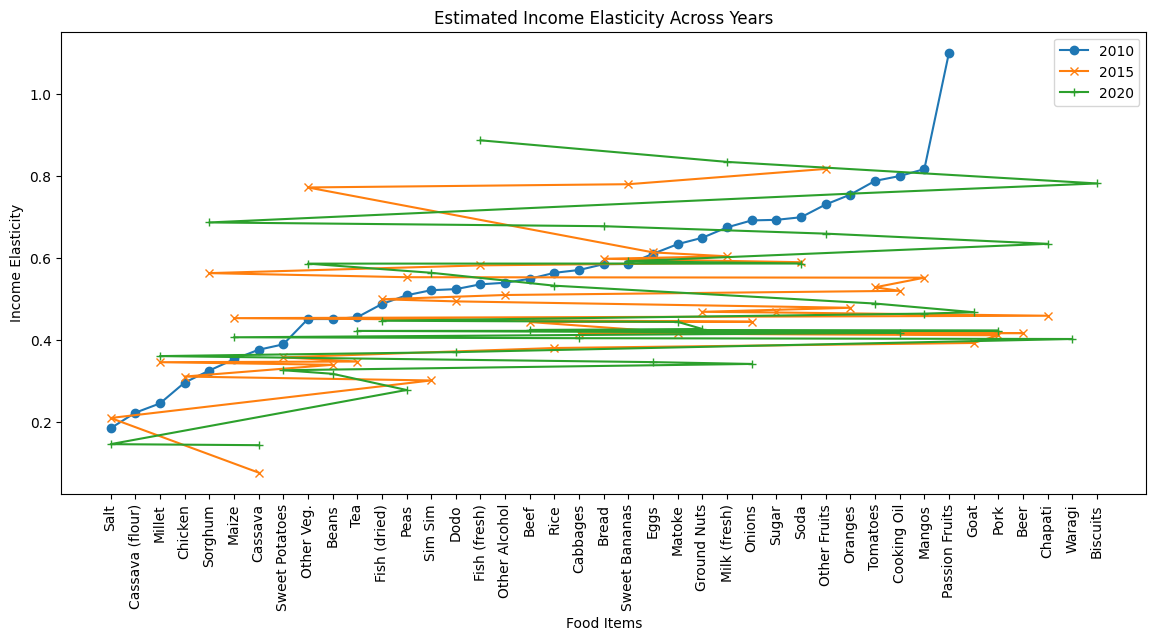

In [152]:
# Example: Comparing estimated income elasticity across years
beta_2010 = result_2010.get_beta().sort_values()
beta_2015 = result_2015.get_beta().sort_values()
beta_2020 = result_2020.get_beta().sort_values()

# You can print these values, or plot them for a visual comparison
# Example plot (ensure you have matplotlib installed)
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(beta_2010, label='2010', marker='o')
plt.plot(beta_2015, label='2015', marker='x')
plt.plot(beta_2020, label='2020', marker='+')
plt.legend()
plt.title('Estimated Income Elasticity Across Years')
plt.xlabel('Food Items')
plt.ylabel('Income Elasticity')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()


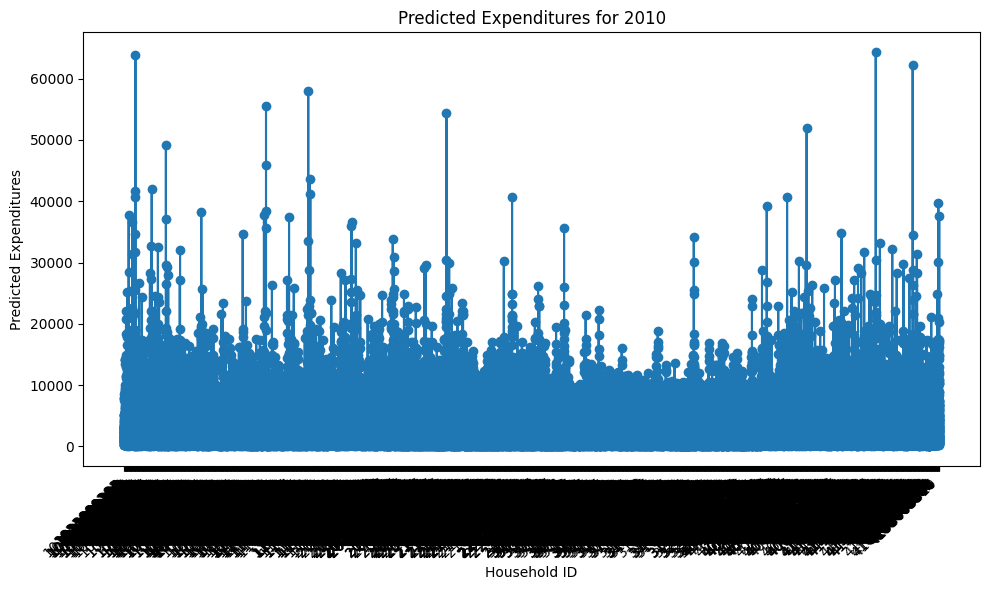

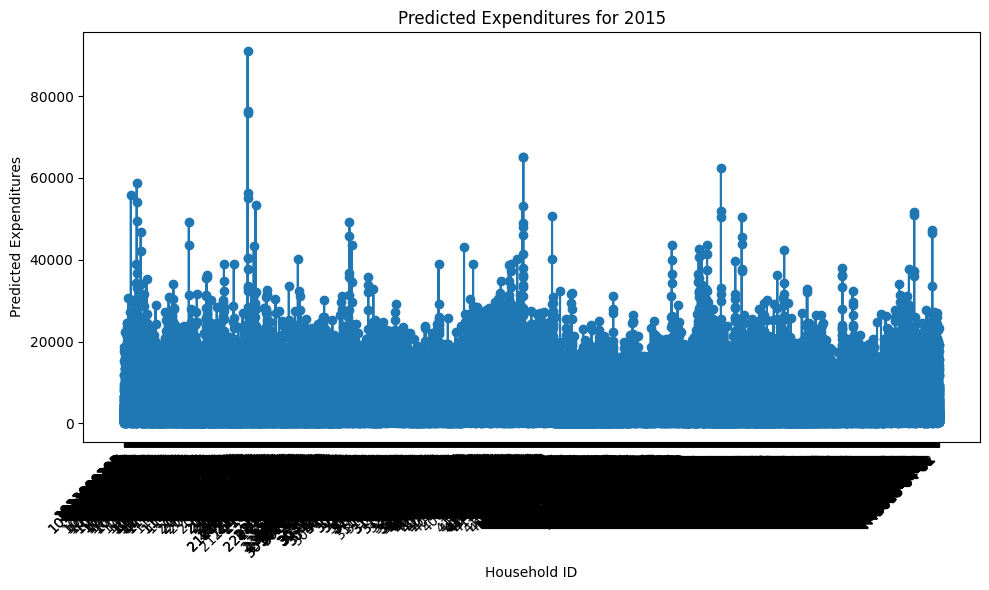

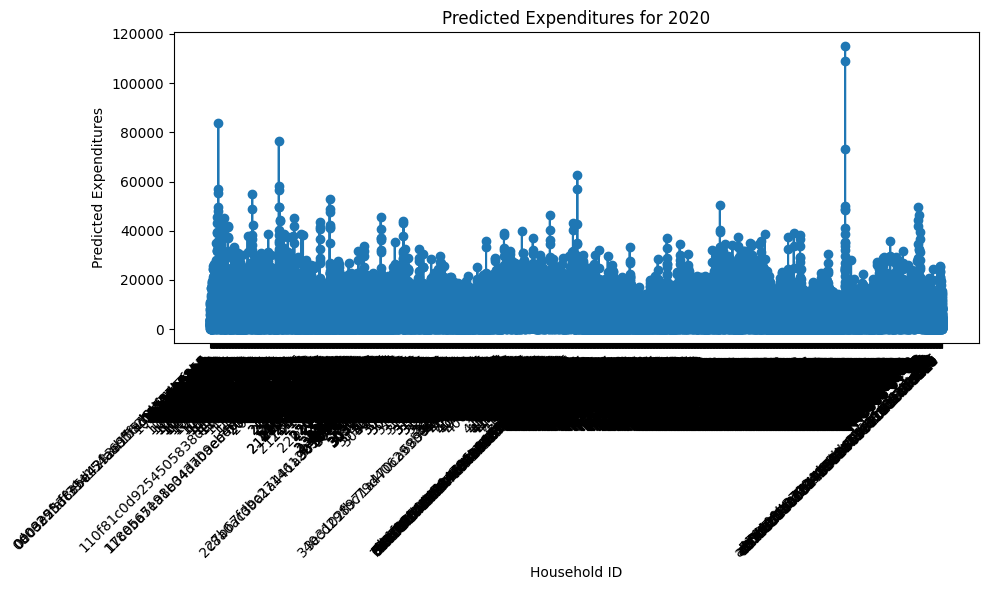

In [154]:
# Function to visualize predicted expenditures over the years
def plot_predicted_expenditures(predicted_expenditures, year, title):
    plt.figure(figsize=(10, 6))
    plt.plot(predicted_expenditures.index.get_level_values('i'), predicted_expenditures.values, marker='o')
    plt.title(title)
    plt.xlabel('Household ID')
    plt.ylabel('Predicted Expenditures')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plotting predicted expenditures for each year
plot_predicted_expenditures(predicted_expenditures_2010, year='2010', title='Predicted Expenditures for 2010')
plot_predicted_expenditures(predicted_expenditures_2015, year='2015', title='Predicted Expenditures for 2015')
plot_predicted_expenditures(predicted_expenditures_2020, year='2020', title='Predicted Expenditures for 2020')


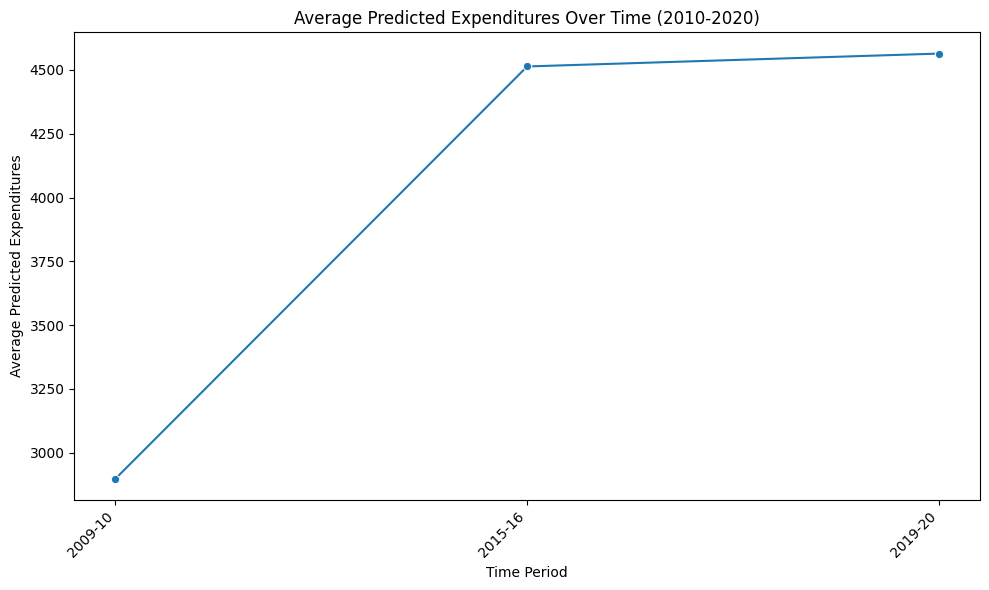

In [158]:
import seaborn as sns

# Combine predicted expenditures for all years into one DataFrame
predicted_expenditures_all = pd.concat([predicted_expenditures_2010, predicted_expenditures_2015, predicted_expenditures_2020])

# Calculate average predicted expenditures over time periods for all years
avg_expenditures_all = predicted_expenditures_all.groupby(level='t').mean().reset_index()

# Plotting average predicted expenditures over time periods for all years
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_expenditures_all, x='t', y=0, marker='o')
plt.title('Average Predicted Expenditures Over Time (2010-2020)')
plt.xlabel('Time Period')
plt.ylabel('Average Predicted Expenditures')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


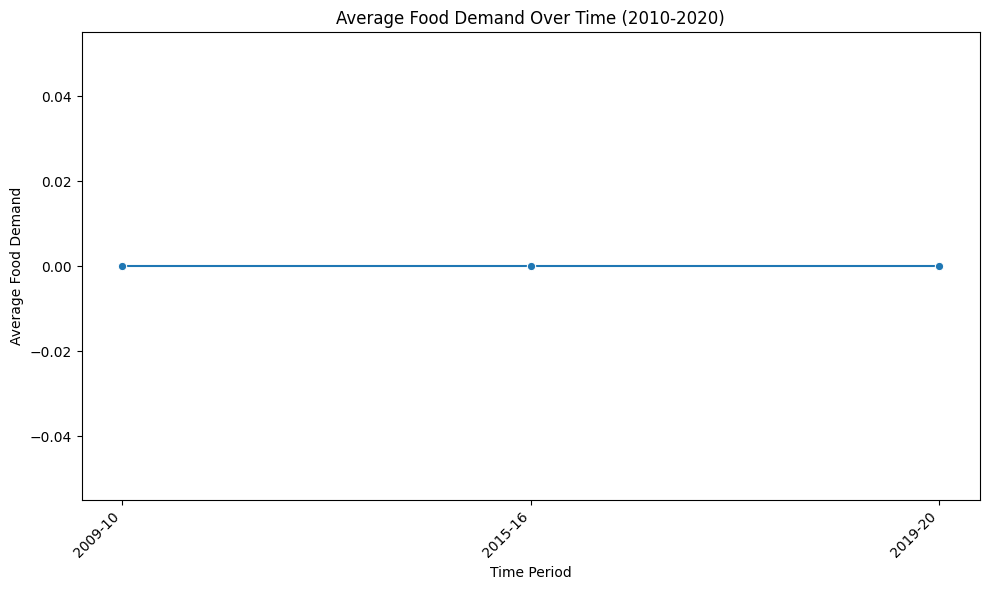

In [159]:
# Combine food demand (predicted expenditures) for all years into one DataFrame
y_all = pd.concat([y_2010, y_2015, y_2020])

# Calculate average food demand over time periods for all years
avg_demand_all = y_all.groupby(level='t').mean().reset_index()

# Plotting average food demand over time periods for all years
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_demand_all, x='t', y=0, marker='o')
plt.title('Average Food Demand Over Time (2010-2020)')
plt.xlabel('Time Period')
plt.ylabel('Average Food Demand')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
